### Visualizations
Now that I have all my data, I can start visualizing it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Total Fares
I want to look at how the total fares are changing over time. The Yellow cab had the largest amount of data, so let's look at it first.

In [2]:
yellow_stats = pd.read_csv('yellow_stats.csv', low_memory=False)
yellow_stats.head()

,max_fare,PU_zone_name_max,DO_zone_name_max,min_fare,PU_zone_name_min,DO_zone_name_min,sum_fares,num_ccs,num_cash,day_avgs,source,month,year,url,filename
0,7661.28,Lenox Hill West,Upper East Side South,2.5,Kensington,Kensington,20337832.22,923615,317996,"[16.515076701184835, 16.097442475670412, 15.93...",yellow,1,2021,https://s3.amazonaws.com/nyc-tlc/trip+data/yel...,yellow-2021-01.csv
1,6969.30,Midtown East,Two Bridges/Seward Park,2.5,Astoria Park,Astoria Park,20581962.71,939415,304856,"[16.378399147558518, 16.381276154527242, 16.69...",yellow,2,2021,https://s3.amazonaws.com/nyc-tlc/trip+data/yel...,yellow-2021-02.csv
2,6010.80,Upper West Side South,Central Harlem North,2.5,Laurelton,Laurelton,29301287.06,1331089,425475,"[16.636681144482775, 16.496921545365453, 16.47...",yellow,3,2021,https://s3.amazonaws.com/nyc-tlc/trip+data/yel...,yellow-2021-03.csv
3,2059.30,Yorkville West,Yorkville West,2.5,University Heights/Morris Heights,East Concourse/Concourse Village,34830185.40,1534333,463029,"[17.481425546301512, 17.35579707665767, 17.220...",yellow,4,2021,https://s3.amazonaws.com/nyc-tlc/trip+data/yel...,yellow-2021-04.csv
4,1165.30,Marine Park/Mill Basin,Brighton Beach,2.5,East Concourse/Concourse Village,East Concourse/Concourse Village,42215363.41,1809267,521178,"[18.283418543805897, 17.768654668323805, 17.91...",yellow,5,2021,https://s3.amazonaws.com/nyc-tlc/trip+data/yel...,yellow-2021-05.csv


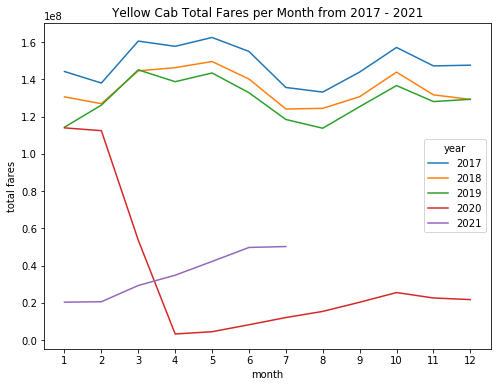

In [3]:
f, ax = plt.subplots(figsize=(8,6))
sns.lineplot(data=yellow_stats, x='month', y='sum_fares', hue='year', palette='tab10')
ax.set_title('Yellow Cab Total Fares per Month from 2017 - 2021')
ax.set_xticks(list(range(1,13)))
ax.set_ylabel('total fares')
plt.show()

#### Ecomomic impact - Yellow Cabs
Looking at the above, years 2017 - 2019 had similar trends over the months, though it is interesting to note the general decline from year to year. In 2020, there is a sharp drop from February to April, which aligns with the start of the covid pandemic. Visually, this a strong correlation. 

Let's look at the same for the Green Cabs.

In [4]:
green_stats = pd.read_csv('green_stats.csv', low_memory=False)
green_stats.head()

,max_fare,PU_zone_name_max,DO_zone_name_max,min_fare,PU_zone_name_min,DO_zone_name_min,sum_fares,num_ccs,num_cash,day_avgs,source,month,year,url,filename
0,293.50,Stapleton,Stapleton,2.50,Corona,Norwood,692416.19,24060,15489,"[17.52057696030978, 17.790914950760968, 17.809...",green,1,2021,https://s3.amazonaws.com/nyc-tlc/trip+data/gre...,green-2021-01.csv
1,207.20,Corona,Broad Channel,3.30,Randalls Island,Randalls Island,626725.24,21591,13119,"[17.99955420466059, 18.147730086669416, 18.567...",green,2,2021,https://s3.amazonaws.com/nyc-tlc/trip+data/gre...,green-2021-02.csv
2,483.06,DUMBO/Vinegar Hill,East Flatbush/Remsen Village,3.05,Astoria Park,Astoria Park,759199.92,25413,16918,"[18.300199549887473, 18.190173640762882, 18.02...",green,3,2021,https://s3.amazonaws.com/nyc-tlc/trip+data/gre...,green-2021-03.csv
3,411.04,Central Park,Stapleton,2.80,West Brighton,East Elmhurst,834182.72,26871,18037,"[18.90855790741697, 18.977560429005926, 18.606...",green,4,2021,https://s3.amazonaws.com/nyc-tlc/trip+data/gre...,green-2021-04.csv
4,2113.55,Bedford Park,Far Rockaway,2.50,Crown Heights North,Seaport,921321.90,30398,18978,"[18.573577958027553, 19.357118978878592, 18.82...",green,5,2021,https://s3.amazonaws.com/nyc-tlc/trip+data/gre...,green-2021-05.csv


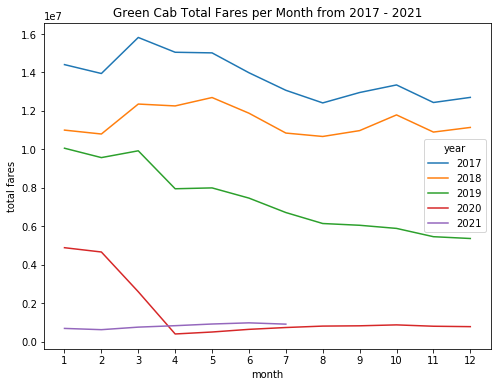

In [5]:
f, ax = plt.subplots(figsize=(8,6))
sns.lineplot(data=green_stats, x='month', y='sum_fares', hue='year', palette='tab10')
ax.set_title('Green Cab Total Fares per Month from 2017 - 2021')
ax.set_xticks(list(range(1,13)))
ax.set_ylabel('total fares')
plt.show()

The green cabs show the same trend as the yellow cabs.

#### Credit Card Transactions
Now let's look at the popularity of payments methods of cash vs. credit. I am going to focus on yellow cab data since it is the most complete, and the green cab data seems to follow similar trends. The ride share data did not provide any type of payment information, so it is not particularly useful in this case.

Text(0.5, 1.0, 'No. of Yellow Cab Credit Card and Cash Transactions per month from 2017 - 2021. \n(Pastels are Credit Card and darker colors are Cash)')

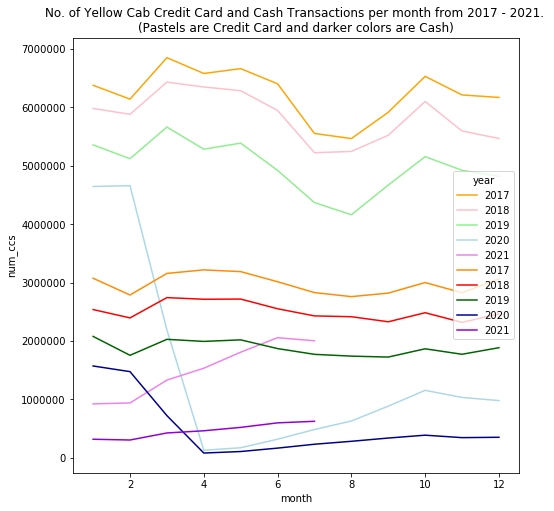

In [6]:
f, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(data=yellow_stats, x='month', y='num_ccs', hue='year', 
             palette=['orange', 'pink', 'lightgreen', 'lightblue', 'violet'], ax=ax, legend=True)
sns.lineplot(data=yellow_stats, x='month', y='num_cash', hue='year', 
             palette=['darkorange', 'red', 'darkgreen', 'darkblue', 'darkviolet'], ax=ax, legend=True)
ax.set_title('''No. of Yellow Cab Credit Card and Cash Transactions per month from 2017 - 2021. 
(Pastels are Credit Card and darker colors are Cash)''')

You can see that credit card has recently been more popular than cash, and was not affected by the pandemic for yellow cabs. I note that 2021 data (purple) so far suggests that the gap may be widening, perhaps due to safety concerns.

#### Most expensive day
To get a sense of the most expensive day, let's take a look at the yellow cab most expensive days from 2021. 

In [7]:
day_names = ['mon_avg_fare', 'tue_avg_fare', 'wed_avg_fare', 'thu_avg_fare', 'fri_avg_fare', 'sat_avg_fare', 'sun_avg_fare']
df_weekly = pd.DataFrame(columns = day_names)
for week in yellow_stats.day_avgs:
    week_list = week.strip('][').split(', ')
    this_week = pd.DataFrame([week_list], columns = day_names).astype('float')
    df_weekly = df_weekly.append(this_week)
df_weekly = df_weekly.reset_index(drop=True)
yellow_stats = yellow_stats.join(df_weekly)

In [10]:
# Look at the averages for all the years 2017-2021
weekly_avgs = yellow_stats[['month','year'] + day_names]
weekly_avgs.describe()

,month,year,mon_avg_fare,tue_avg_fare,wed_avg_fare,thu_avg_fare,fri_avg_fare,sat_avg_fare,sun_avg_fare
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,6.181818,2018.818182,17.236039,17.076629,17.166398,17.454237,17.293086,16.305655,17.204315
std,3.437758,1.348400,1.442705,1.364442,1.355844,1.404371,1.361902,1.338790,1.426797
min,1.000000,2017.000000,15.338364,15.279122,14.908482,15.339453,15.338642,14.260068,14.953658
25%,3.000000,2018.000000,16.277393,16.102922,16.340189,16.596911,16.413197,15.233989,16.068609
50%,6.000000,2019.000000,16.678570,16.510400,16.711379,16.849988,16.801264,15.987001,16.786880
75%,9.000000,2020.000000,18.636104,18.455171,18.429827,18.676058,18.448691,17.327322,18.334548
max,12.000000,2021.000000,20.259518,20.179884,19.738850,19.987687,19.943193,18.750040,19.943065


Looking at the averages row, Thursday is on average the most expensive, and Saturday is cheapest. Now let's compare 2017 to 2021.

In [21]:
# Look at the averages for all the years 2017
avgs2017 = weekly_avgs[weekly_avgs['year']==2017]
avgs2017.describe()

,month,year,mon_avg_fare,tue_avg_fare,wed_avg_fare,thu_avg_fare,fri_avg_fare,sat_avg_fare,sun_avg_fare
count,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,2017.0,16.283797,16.144786,16.374160,16.591549,16.372345,15.087479,15.992458
std,3.605551,0.0,0.420233,0.518061,0.387363,0.512207,0.403214,0.370260,0.502940
min,1.000000,2017.0,15.338364,15.279122,15.502211,15.428387,15.456254,14.270804,15.162233
25%,3.750000,2017.0,16.181334,15.782486,16.310115,16.568427,16.279804,14.930061,15.656038
50%,6.500000,2017.0,16.250974,16.258354,16.395734,16.739171,16.388650,15.194146,16.101461
75%,9.250000,2017.0,16.514579,16.523986,16.613279,16.874145,16.520285,15.381100,16.365139
max,12.000000,2017.0,17.003480,16.832681,16.839518,17.084704,16.953174,15.472044,16.616658


In [22]:
# Look at the averages for all the years 2021
avgs2021 = weekly_avgs[weekly_avgs['year']==2021]
avgs2021.describe()

,month,year,mon_avg_fare,tue_avg_fare,wed_avg_fare,thu_avg_fare,fri_avg_fare,sat_avg_fare,sun_avg_fare
count,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,4.000000,2021.0,17.626120,17.302414,17.358984,17.668652,17.718617,17.300401,18.211088
std,2.160247,0.0,1.199773,1.006621,1.067754,1.213691,1.235705,0.946952,1.141376
min,1.000000,2021.0,16.378399,16.097442,15.938596,16.216951,16.276627,16.169346,16.805818
25%,2.500000,2021.0,16.575879,16.439099,16.586146,16.697869,16.694745,16.595282,17.381646
50%,4.000000,2021.0,17.481426,17.355797,17.220050,17.407284,17.545899,17.178434,18.067055
75%,5.500000,2021.0,18.441961,18.125292,18.211791,18.723808,18.764581,17.907211,18.949193
max,7.000000,2021.0,19.487335,18.534876,18.758367,19.212973,19.289143,18.750040,19.943065


Comparing the 2021 values to 2017, the first thing I notice is that average cost has increased. Further, in 2017 the most expensive day was Thursday, which is in line with the results when I looked at all of the year. However, in 2021, the most expensive day is now Sunday, having an average of $2 increase from 2017 to 2021. 

#### Most expensive trip
Now let's look at the most expensive trips.

In [26]:
most_expensive = yellow_stats[['month','year', 'max_fare', 'PU_zone_name_max', 'DO_zone_name_max']]
most_expensive

,month,year,max_fare,PU_zone_name_max,DO_zone_name_max
0,1,2021,7661.28,Lenox Hill West,Upper East Side South
1,2,2021,6969.30,Midtown East,Two Bridges/Seward Park
2,3,2021,6010.80,Upper West Side South,Central Harlem North
3,4,2021,2059.30,Yorkville West,Yorkville West
4,5,2021,1165.30,Marine Park/Mill Basin,Brighton Beach
5,6,2021,627.80,Astoria Park,Randalls Island
6,7,2021,1320.80,Laurelton,Borough Park
7,1,2020,4268.30,Port Richmond,Marble Hill
8,2,2020,967.05,Corona,TriBeCa/Civic Center
9,3,2020,1000003.80,Randalls Island,Randalls Island


Looking at the results, this is something that given more time, I would explore further. Some of the most expensive fares were coming back unreasonably high, and it warrants investigation what this data means, since I cannot rely on it at this time. As illustrated perusing some of outrageious fares above.

### Conclusion
In conclusion, there is strong visual inidcation that the pandemic aligns with a steep fall in total fares. There is also some evidence that the pandemic may be influencing the popularity of credit card transaction, though they were more popular before. One of the interesting finds is that post-pandemic most expensive days seem to have shifted to the weekend rather than a weekday. 

#### Further work
Given more time, I would want to explore the issue with the fare outliers and also spend more time looking at different trends and visualizing them.